<a href="https://colab.research.google.com/github/swilsonmfc/pandas/blob/main/10_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series

# Install
* Restart the runtime to use pdarima & updated statsmodels

In [ ]:
!pip install pmdarima

# Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

import statsmodels.api as sm

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import HoltWintersResults

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAXResults

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.statespace.tools import diff

import pmdarima as pm
from pmdarima.arima import AutoARIMA

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,6

# Nile River
* Annual volume flows

In [ ]:
data = sm.datasets.nile.load_pandas()
nile_df = data.data
nile_df

,year,volume
0,1871.0,1120.0
1,1872.0,1160.0
2,1873.0,963.0
3,1874.0,1210.0
4,1875.0,1160.0
...,...,...
95,1966.0,746.0
96,1967.0,919.0
97,1968.0,718.0
98,1969.0,714.0


In [ ]:
# Convert year to DateTimeIndex, Set index & Drop year column


DatetimeIndex(['1871-01-01', '1872-01-01', '1873-01-01', '1874-01-01',
               '1875-01-01', '1876-01-01', '1877-01-01', '1878-01-01',
               '1879-01-01', '1880-01-01', '1881-01-01', '1882-01-01',
               '1883-01-01', '1884-01-01', '1885-01-01', '1886-01-01',
               '1887-01-01', '1888-01-01', '1889-01-01', '1890-01-01',
               '1891-01-01', '1892-01-01', '1893-01-01', '1894-01-01',
               '1895-01-01', '1896-01-01', '1897-01-01', '1898-01-01',
               '1899-01-01', '1900-01-01', '1901-01-01', '1902-01-01',
               '1903-01-01', '1904-01-01', '1905-01-01', '1906-01-01',
               '1907-01-01', '1908-01-01', '1909-01-01', '1910-01-01',
               '1911-01-01', '1912-01-01', '1913-01-01', '1914-01-01',
               '1915-01-01', '1916-01-01', '1917-01-01', '1918-01-01',
               '1919-01-01', '1920-01-01', '1921-01-01', '1922-01-01',
               '1923-01-01', '1924-01-01', '1925-01-01', '1926-01-01',
      

In [ ]:
# Add frequency to index (hint:  use asfreq with AS)


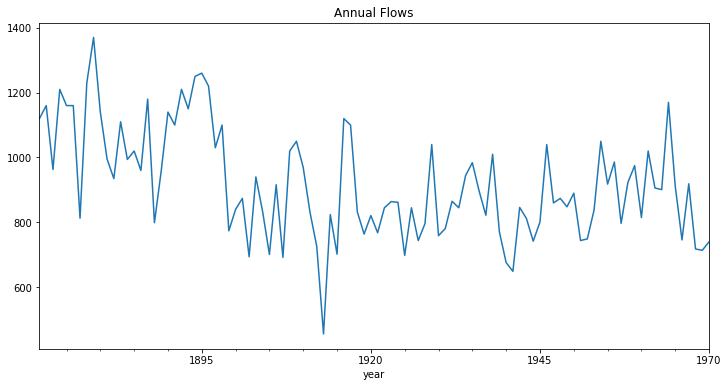

In [ ]:
# Plot Volume
nile_df.volume.plot()
plt.title('Annual Flows');

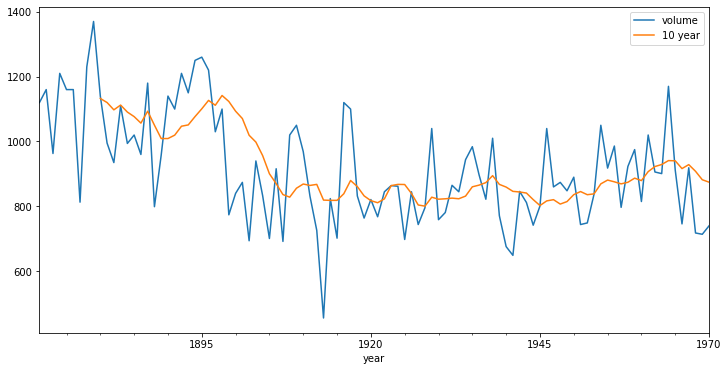

In [ ]:
# Plot the annual flowas and a 10 year rolling average


In [ ]:
# Helper function for interpreting Augmented Dickey-Fuller test for stationarity
def stationarity_test(values, critical = 0.05):
    results = adfuller(values)
    print(f'Augmented Dickey-Fuller Statistic {results[0]}')
    print(f'  p-value {results[1]}')
    print(f'  Lags used {results[2]}')
    print(f'  Number observations {results[3]}')
    if results[1] < critical:
        print('Strong evidence to reject no unit roots')
        print('There is stationarity')
    else:
        print('Weak evidence to reject no unit roots')
        print('There is not stationarity')

In [ ]:
# Test for Stationarity


Augmented Dickey-Fuller Statistic -4.048705096914342
  p-value 0.0011758879503871243
  Lags used 1
  Number observations 98
Strong evidence to reject no unit roots
There is stationarity


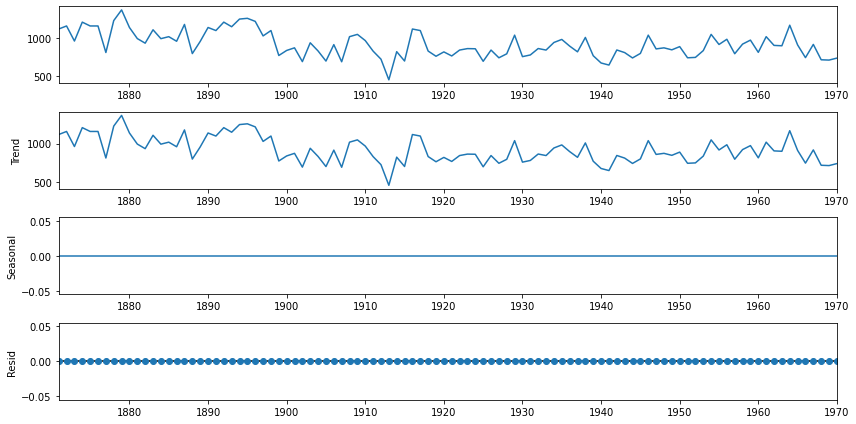

In [ ]:
# Decompose the time series


In [ ]:
# Build simple exponential smoothing model


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


In [ ]:
# Print summary


Dep. Variable:,volume,No. Observations:,100
Model:,SimpleExpSmoothing,SSE,2038674.432
Optimized:,True,AIC,996.264
Trend:,None,BIC,1001.474
Seasonal:,None,AICC,996.685
Seasonal Periods:,None,Date:,"Tue, 31 Aug 2021"
Box-Cox:,False,Time:,13:20:53
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2457279,alpha,True
initial_level,1110.7448,l.0,True


In [ ]:
# Predict for 1971-01-01 


1971-01-01    805.316342
Freq: AS-JAN, dtype: float64

# Air Passengers

In [ ]:
# Download
!wget -O air.csv https://github.com/swilsonmfc/pandas/raw/main/AirPassengers.csv

--2021-08-31 13:20:53--  https://github.com/swilsonmfc/pandas/raw/main/AirPassengers.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/swilsonmfc/pandas/main/AirPassengers.csv [following]
--2021-08-31 13:20:54--  https://raw.githubusercontent.com/swilsonmfc/pandas/main/AirPassengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1746 (1.7K) [text/plain]
Saving to: ‘air.csv’

air.csv             100%[===================>]   1.71K  --.-KB/s    in 0s      

2021-08-31 13:20:54 (21.3 MB/s) - ‘air.csv’ saved [1746/1746]



In [ ]:
# Load air.csv & convert dates using parse_dates
pax_df = pd.read_csv('air.csv', parse_dates=['Month'])
pax_df

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [ ]:
# Set index and frequency
pax_df = pax_df.set_index('Month')
pax_df = pax_df.asfreq('MS')
pax_df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


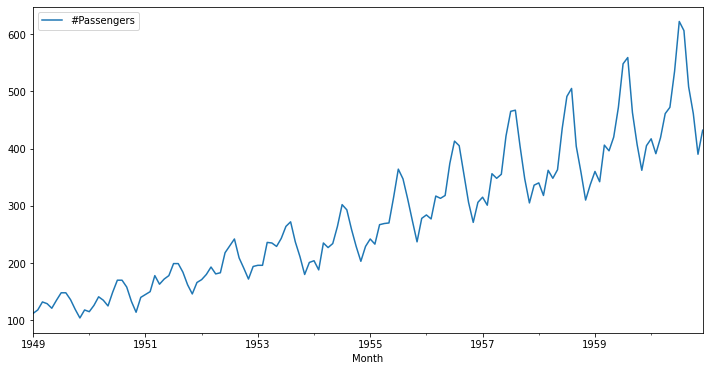

In [ ]:
# Plot the number of passengers


In [ ]:
# Compute the average number of passengers by year


,#Passengers
Month,
1949-12-31,126.666667
1950-12-31,139.666667
1951-12-31,170.166667
1952-12-31,197.000000
1953-12-31,225.000000
1954-12-31,238.916667
1955-12-31,284.000000
1956-12-31,328.250000
1957-12-31,368.416667


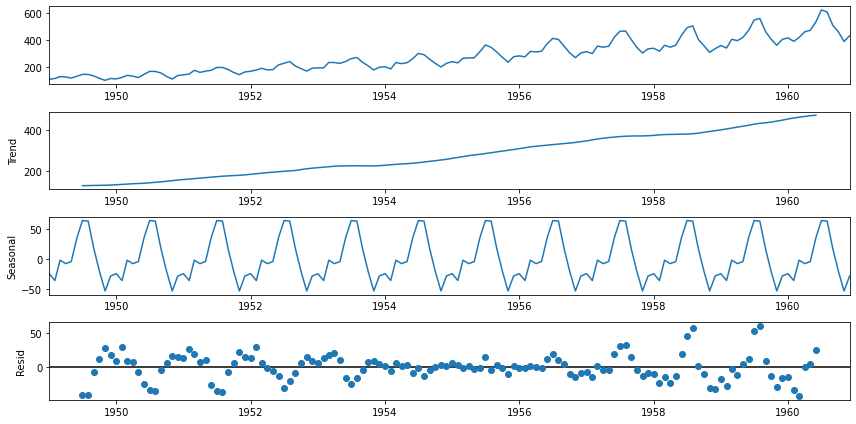

In [ ]:
# Decompose the series using additive


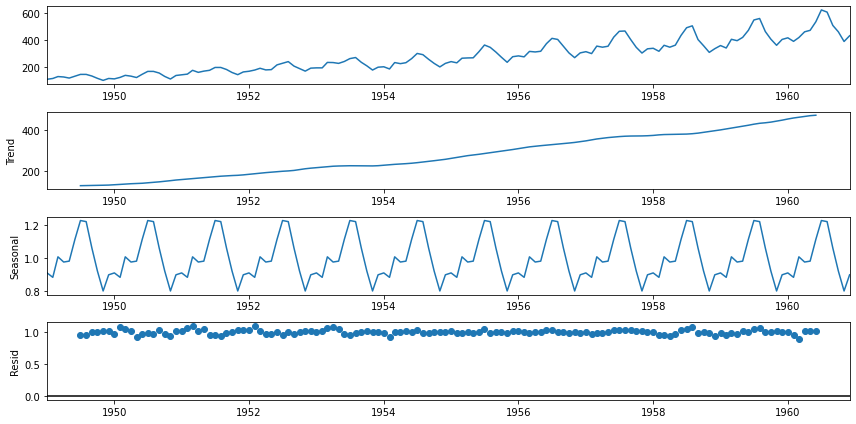

In [ ]:
# Decompose the series using multiplicative


In [ ]:
# Build AutoArima model
# Define model with parameters 
#  start_p=0, max_p=3
#  start_q=0, max_q=3
#  seasonal=True, m=12
#  trace=True 
# Fit model


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1032.128, Time=0.55 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.56 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.12 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.68 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=6.52 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=1.02 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.57 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=1.00 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=1.25 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.71 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.36 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=4.10 sec
 ARIMA(0,1,1)(1,1,1)[12]     

AutoARIMA(D=None, alpha=0.05, d=None, error_action='trace',
          information_criterion='aic', m=12, max_D=1, max_P=2, max_Q=2, max_d=2,
          max_order=5, max_p=3, max_q=3, maxiter=50, method='lbfgs', n_fits=10,
          n_jobs=1, offset_test_args=None, out_of_sample_size=0, random=False,
          random_state=None, scoring='mse', scoring_args=None, seasonal=True,
          seasonal_test='ocsb', seasonal_test_args=None, start_P=1, start_Q=1,
          start_p=0, start_params=None, ...)

Text(0.5, 1.0, 'Passenger Forecast')

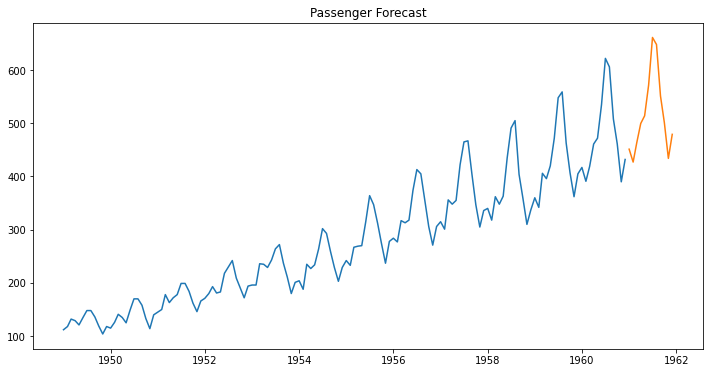

In [ ]:
# Generate & plot predictions for next 12 months
